In [3]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=293152 sha256=01255dc17fed677b18ae0235a0e2736864b21f71218a6b351f1627ab5eb4fec6
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import pandas as pd
import os

In [8]:
#Define the ticker symbol and period for which we want to fetch the stock prices
ticker = "DLF.NS"
start_date = "2021-01-04"
end_date = "2024-05-01"

#Fetch the stock prices for the specified period
data = yf.download(ticker, start=start_date, end=end_date)

#Print the fetched stock prices
print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  239.850006  245.000000  233.199997  244.300003  238.937897   
2021-01-05  241.949997  246.949997  239.500000  241.750000  236.443878   
2021-01-06  241.699997  244.399994  234.649994  241.050003  235.759232   
2021-01-07  244.899994  249.300003  242.600006  245.399994  240.013748   
2021-01-08  247.899994  252.449997  245.899994  248.300003  242.850128   
...                ...         ...         ...         ...         ...   
2024-04-24  889.799988  898.200012  885.500000  893.500000  893.500000   
2024-04-25  893.500000  897.000000  882.750000  893.799988  893.799988   
2024-04-26  896.000000  911.599976  893.750000  908.000000  908.000000   
2024-04-29  913.000000  915.000000  876.849976  886.099976  886.099976   
2024-04-30  888.799988  907.500000  881.900024  891.849976  891.849976   

              Volume  
Date          

In [9]:
df = pd.DataFrame(data)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.850006,245.000000,233.199997,244.300003,238.937897,17172770
2021-01-05,241.949997,246.949997,239.500000,241.750000,236.443878,17130907
2021-01-06,241.699997,244.399994,234.649994,241.050003,235.759232,12995777
2021-01-07,244.899994,249.300003,242.600006,245.399994,240.013748,16159966
2021-01-08,247.899994,252.449997,245.899994,248.300003,242.850128,15045597


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 820 entries, 2021-01-04 to 2024-04-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       820 non-null    float64
 1   High       820 non-null    float64
 2   Low        820 non-null    float64
 3   Close      820 non-null    float64
 4   Adj Close  820 non-null    float64
 5   Volume     820 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 44.8 KB


In [13]:
df['date']=pd.to_datetime(df.index)

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2021-01-04,239.850006,245.000000,233.199997,244.300003,238.937897,17172770,2021-01-04
2021-01-05,241.949997,246.949997,239.500000,241.750000,236.443878,17130907,2021-01-05
2021-01-06,241.699997,244.399994,234.649994,241.050003,235.759232,12995777,2021-01-06
2021-01-07,244.899994,249.300003,242.600006,245.399994,240.013748,16159966,2021-01-07
2021-01-08,247.899994,252.449997,245.899994,248.300003,242.850128,15045597,2021-01-08


In [16]:
#Using plotly for advance data representation
import plotly.graph_objects as go

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'])])

# Customize the chart layout
fig.update_layout(title='Stock Price Chart DLF.NS', yaxis_title='Price (₹)', xaxis_rangeslider_visible=False)

# Display the chart
fig.show()

In [17]:
df.drop(['date','Volume'], axis=1, inplace=True)

In [18]:
df.reset_index(drop=True, inplace=True)

<Axes: >

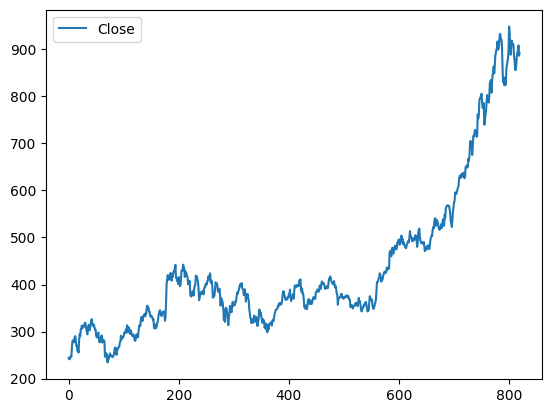

In [19]:
df.plot.line(y="Close", use_index=True)

In [20]:
df.reset_index(drop=True, inplace=True)

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Split the dataset into training and testing sets
X = df[['Open', 'Close', 'High', 'Low', 'Adj Close']] #Input Features
y = df['Close'] #Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=79)

#Build the Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=200, random_state=79)

#Train the model
rf.fit(X_train, y_train)

#Make predictions on the testing set
y_pred = rf.predict(X_test)

#Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.9714702139355751


In [61]:
df.tail()

,Open,High,Low,Close,Adj Close
815,889.799988,898.200012,885.500000,893.500000,893.500000
816,893.500000,897.000000,882.750000,893.799988,893.799988
817,896.000000,911.599976,893.750000,908.000000,908.000000
818,913.000000,915.000000,876.849976,886.099976,886.099976
819,888.799988,907.500000,881.900024,891.849976,891.849976


In [62]:
import numpy as np

#Input values to predict the stock price
new_data = np.array([[888.799988, 907.500000, 881.900024, 891.849976, 891.849976]])

#Make predictions using the trained model
predicted_price = rf.predict(new_data)

#Print the predicted stock price
print('Predicted Stock Price:', predicted_price[0])

Predicted Stock Price: 898.443244934082


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

